<a href="https://colab.research.google.com/github/anjaleeDS/TECH26_F24/blob/main/TECH26_Lab2_scatter_graphs_%26_line_graphs_%26_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scatterplots



## Load and look at data

In [2]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt

# data.list_datasets()

# get data
df = data.cars()

# look at data and select which dimensions you want to plot
df.dtypes, df.shape, df.head()



(Name                        object
 Miles_per_Gallon           float64
 Cylinders                    int64
 Displacement               float64
 Horsepower                 float64
 Weight_in_lbs                int64
 Acceleration               float64
 Year                datetime64[ns]
 Origin                      object
 dtype: object,
 (406, 9),
                         Name  Miles_per_Gallon  Cylinders  Displacement  \
 0  chevrolet chevelle malibu              18.0          8         307.0   
 1          buick skylark 320              15.0          8         350.0   
 2         plymouth satellite              18.0          8         318.0   
 3              amc rebel sst              16.0          8         304.0   
 4                ford torino              17.0          8         302.0   
 
    Horsepower  Weight_in_lbs  Acceleration       Year Origin  
 0       130.0           3504          12.0 1970-01-01    USA  
 1       165.0           3693          11.5 1970-01-01    USA  

In [3]:
df.dtypes

,0
Name,object
Miles_per_Gallon,float64
Cylinders,int64
Displacement,float64
Horsepower,float64
Weight_in_lbs,int64
Acceleration,float64
Year,datetime64[ns]
Origin,object


##Scatterplots

Template:
- get data
- look at data and select which dimensions you want to plot
- title the plot, summary if needed and label the x and y axes
- if needed, update x & y axes with increments that make sense
- show plot

[pyplot reference](https://matplotlib.org/stable/api/pyplot_summary.html)

### Scatter plots with matplotlib.pyplot

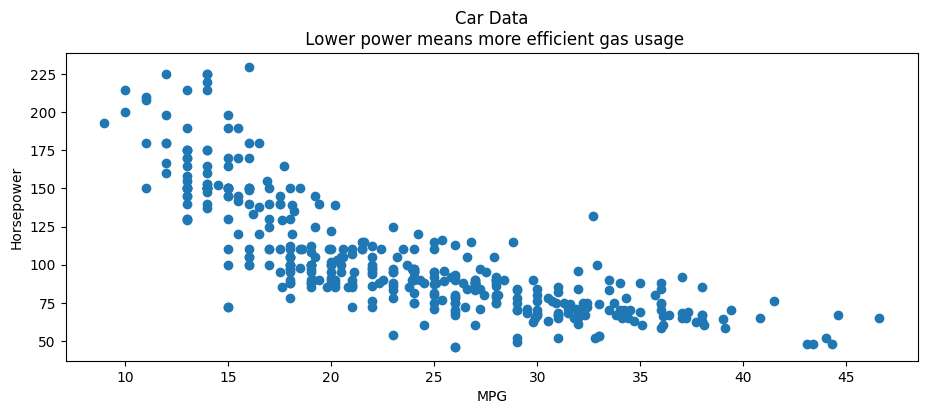

In [4]:
# establish size of plot and select data

plt.figure(figsize = (11,4)) # optional
plt.scatter(x=df['Miles_per_Gallon'], y=df['Horsepower'])

# label title (with summary), x,y

plt.title("Car Data\n Lower power means more efficient gas usage")
plt.xlabel("MPG")
plt.ylabel("Horsepower")

plt.show() # this isn't necessary, so what happens when you take it out?

In [5]:
df['Origin']

,Origin
0,USA
1,USA
2,USA
3,USA
4,USA
...,...
401,USA
402,Europe
403,USA
404,USA


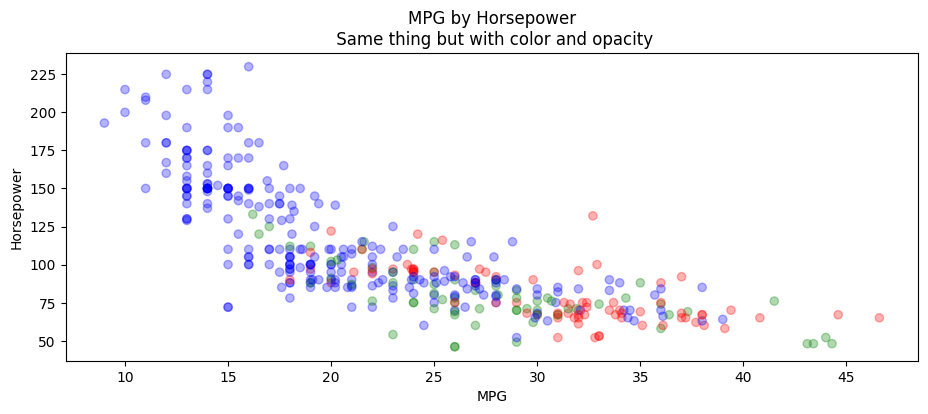

In [6]:
# adding another dimension, Origin (nominal) using color and a lighter transparency to see overlap

#df['Origin'].value_counts() #Start by seeing how many distinct origins there are
colors = {'USA': 'blue', 'Europe': 'green', 'Japan': 'red'} #assigning each Origin value with a color


plt.figure(figsize = (11,4))
plt.scatter(x=df['Miles_per_Gallon'], y=df['Horsepower'], c=df['Origin'].map(colors), alpha=0.3)

plt.title("MPG by Horsepower\n Same thing but with color and opacity")
plt.xlabel("MPG")
plt.ylabel("Horsepower")

plt.show()

### Multiple Scatterplots?
Use the ax option to get more control of what to show.

[plt gallery - scatter plot with more than 1 graph](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)

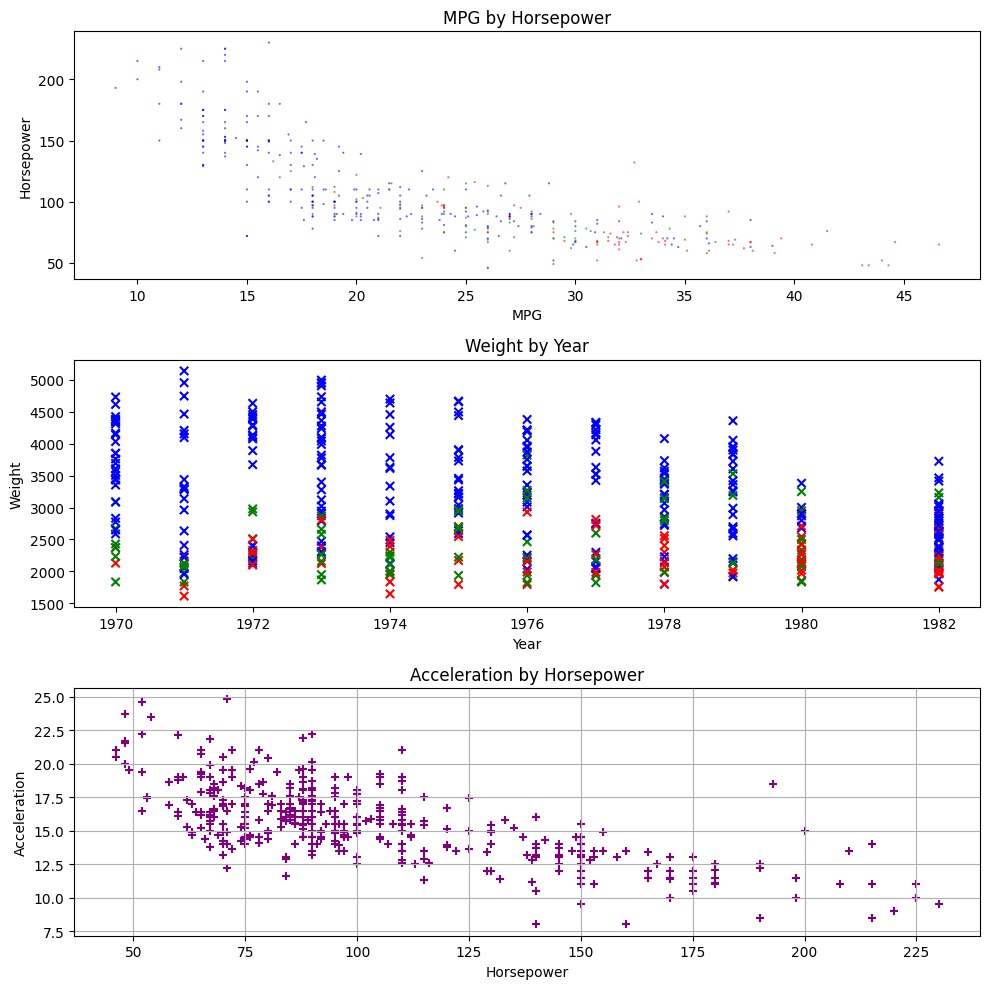

In [7]:
# multiple plots using matplotlib

fig, ax = plt.subplots(nrows=3,ncols=1, figsize = (10,10))

colors = {'USA': 'blue', 'Europe': 'green', 'Japan': 'red'} #assigning each Origin value with a color
## Graph 1
ax[0].scatter(x=df['Miles_per_Gallon'], y=df['Horsepower'], c=df['Origin'].map(colors), alpha=0.6,s=0.3)
ax[0].set_title("MPG by Horsepower")
ax[0].set_xlabel("MPG")
ax[0].set_ylabel("Horsepower")

## Graph 2
ax[1].scatter(x=df['Year'], y=df['Weight_in_lbs'], c=df['Origin'].map(colors), marker=("x"))
ax[1].set_title("Weight by Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Weight")

## Graph3
ax[2].scatter(x=df['Horsepower'], y=df['Acceleration'], c='purple', marker="+")
ax[2].set_title("Acceleration by Horsepower")
ax[2].set_xlabel("Horsepower")
ax[2].set_ylabel("Acceleration")
ax[2].grid()

plt.tight_layout()
plt.show()

### Scatter plots with Seaborn

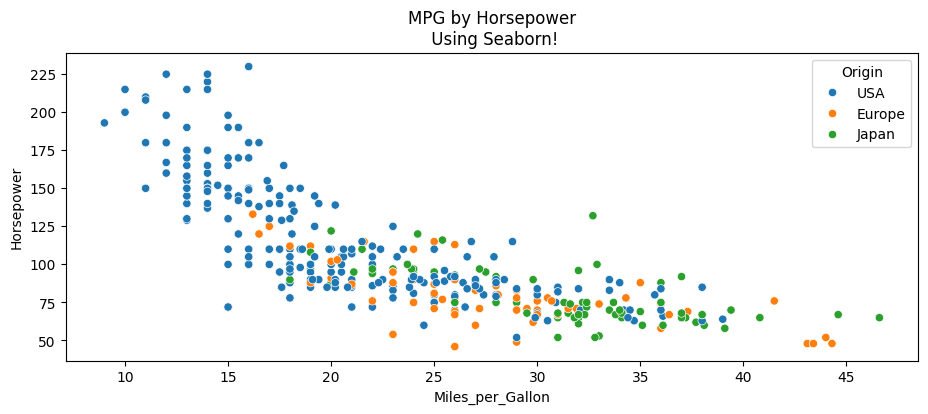

In [8]:
import seaborn as sns

plt.figure(figsize=(11,4))
sns.scatterplot(data= df, x='Miles_per_Gallon',y='Horsepower',hue='Origin')

# you get the axes labels and legend for free!
plt.title("MPG by Horsepower\n Using Seaborn!")
plt.show()

### Seaborn also is able to do multiple scatterplots with relplot (relational plots)

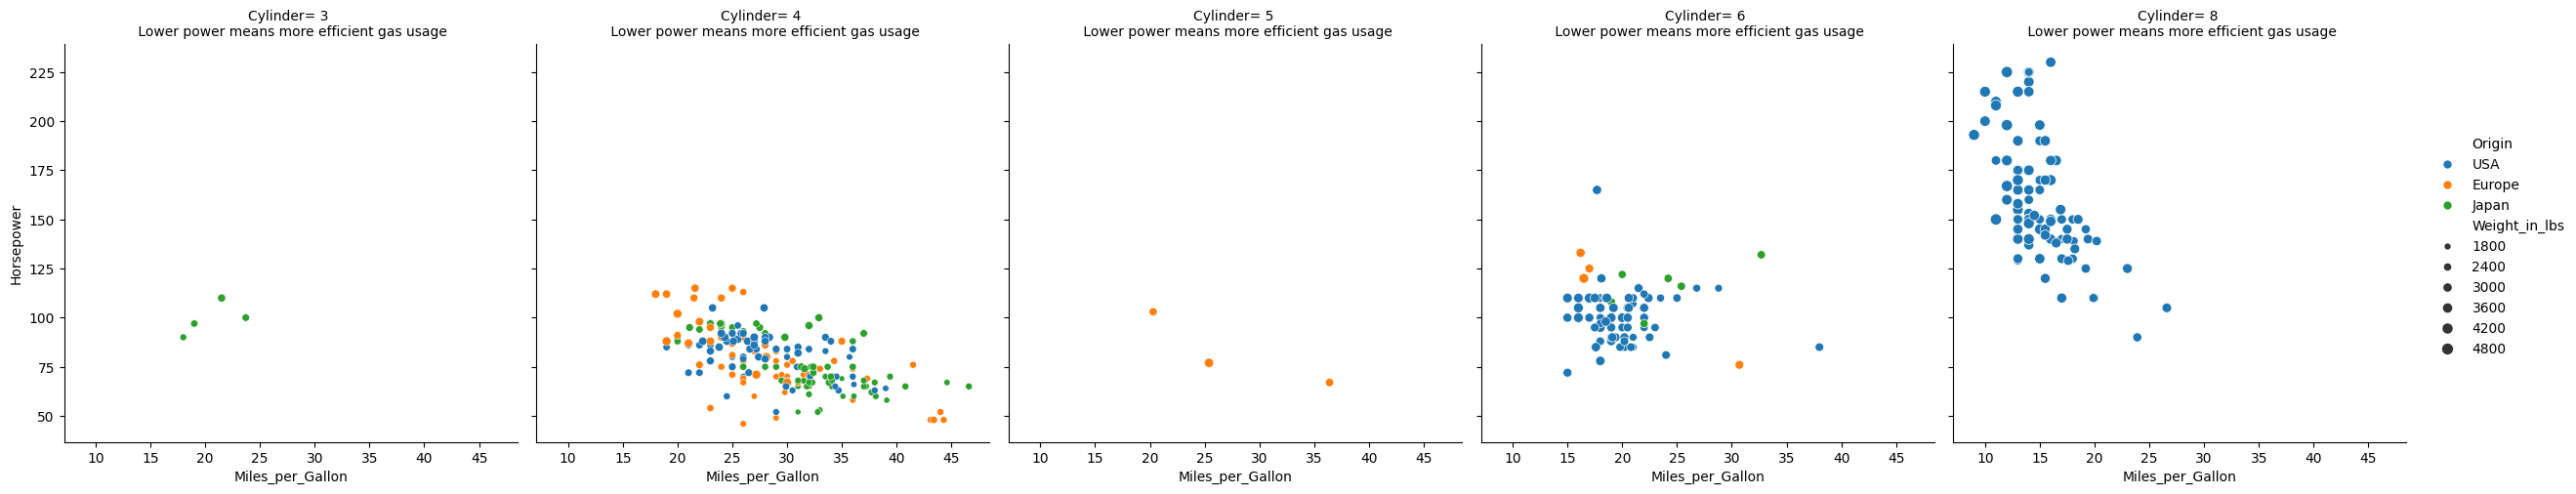

In [9]:
# sns.relplot(data=df, x='Horsepower', y='Acceleration', kind = 'scatter', col='Origin', size='Miles_per_Gallon')

# plt.show()

sns.relplot(df, x='Miles_per_Gallon', y='Horsepower',
           hue = 'Origin', size='Weight_in_lbs',
           col='Cylinders').set_titles("Cylinder= {col_name} \n Lower power means more efficient gas usage")
plt.show()

#Heatmaps

Heatmaps are used to find correlations between numerical variables/columns.

Depending on the variables, the relationship might span -1 to 1 or 0 to N,

In [10]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# data.list_datasets()

# get data
df = data.cars()

df.dtypes

,0
Name,object
Miles_per_Gallon,float64
Cylinders,int64
Displacement,float64
Horsepower,float64
Weight_in_lbs,int64
Acceleration,float64
Year,datetime64[ns]
Origin,object


In [11]:
# correlations or heatmaps can only use numerical values to compare against
# here isa good time to change the car dataset to only have numbers

# easy and manual way. give a list of columns that are a number type.
# remember Year is datetime type!
df_cars_num1 = df[['Miles_per_Gallon','Cylinders', 'Displacement', 'Weight_in_lbs', 'Horsepower', 'Acceleration']]
# df_cars_num1

# different and automatic way. use select_dtypes() to get all 'number' types
df_cars_num2 = df.select_dtypes(include=['number'])
df_cars_num2.head()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


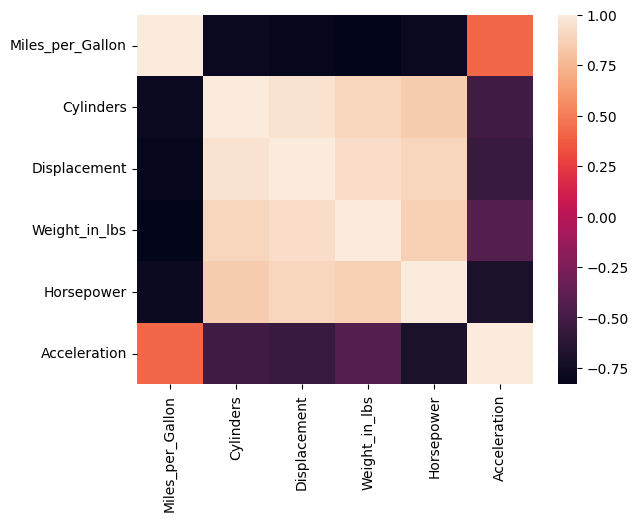

In [12]:
# calculate the correlation matrix
car_corr = df_cars_num1.corr()

sns.heatmap(car_corr)
plt.show()

In [13]:
# cmap is color palette and options are listed here:
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://seaborn.pydata.org/tutorial/aesthetics.html

sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

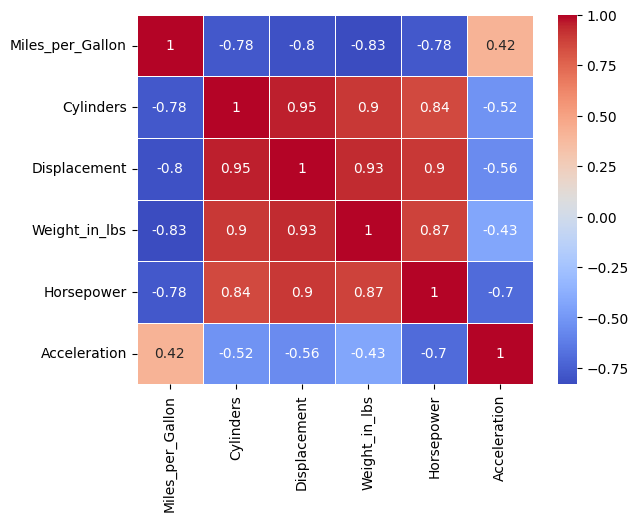

In [14]:
# different parameters to use with heatmap like annotate and colormap
sns.heatmap(car_corr, annot=True, cmap='coolwarm', linewidths=.5)

plt.show()

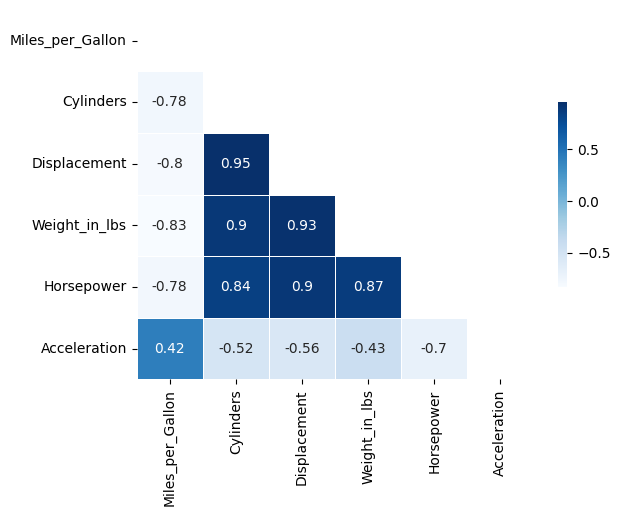

In [15]:
# If the matrix is symmetric, why not make it a triangle?
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(car_corr, dtype=bool))

# cbar_kws is the color bar legend on the right. we're shrinking it by half
sns.heatmap(car_corr, annot=True, cmap='Blues', mask=mask, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

## Pairplots
Another way to look at the correlation between variables is to use pairplot.

Where the correlation matrix is the summary, the pairplot let's you see the details of the relationship between a list of variables

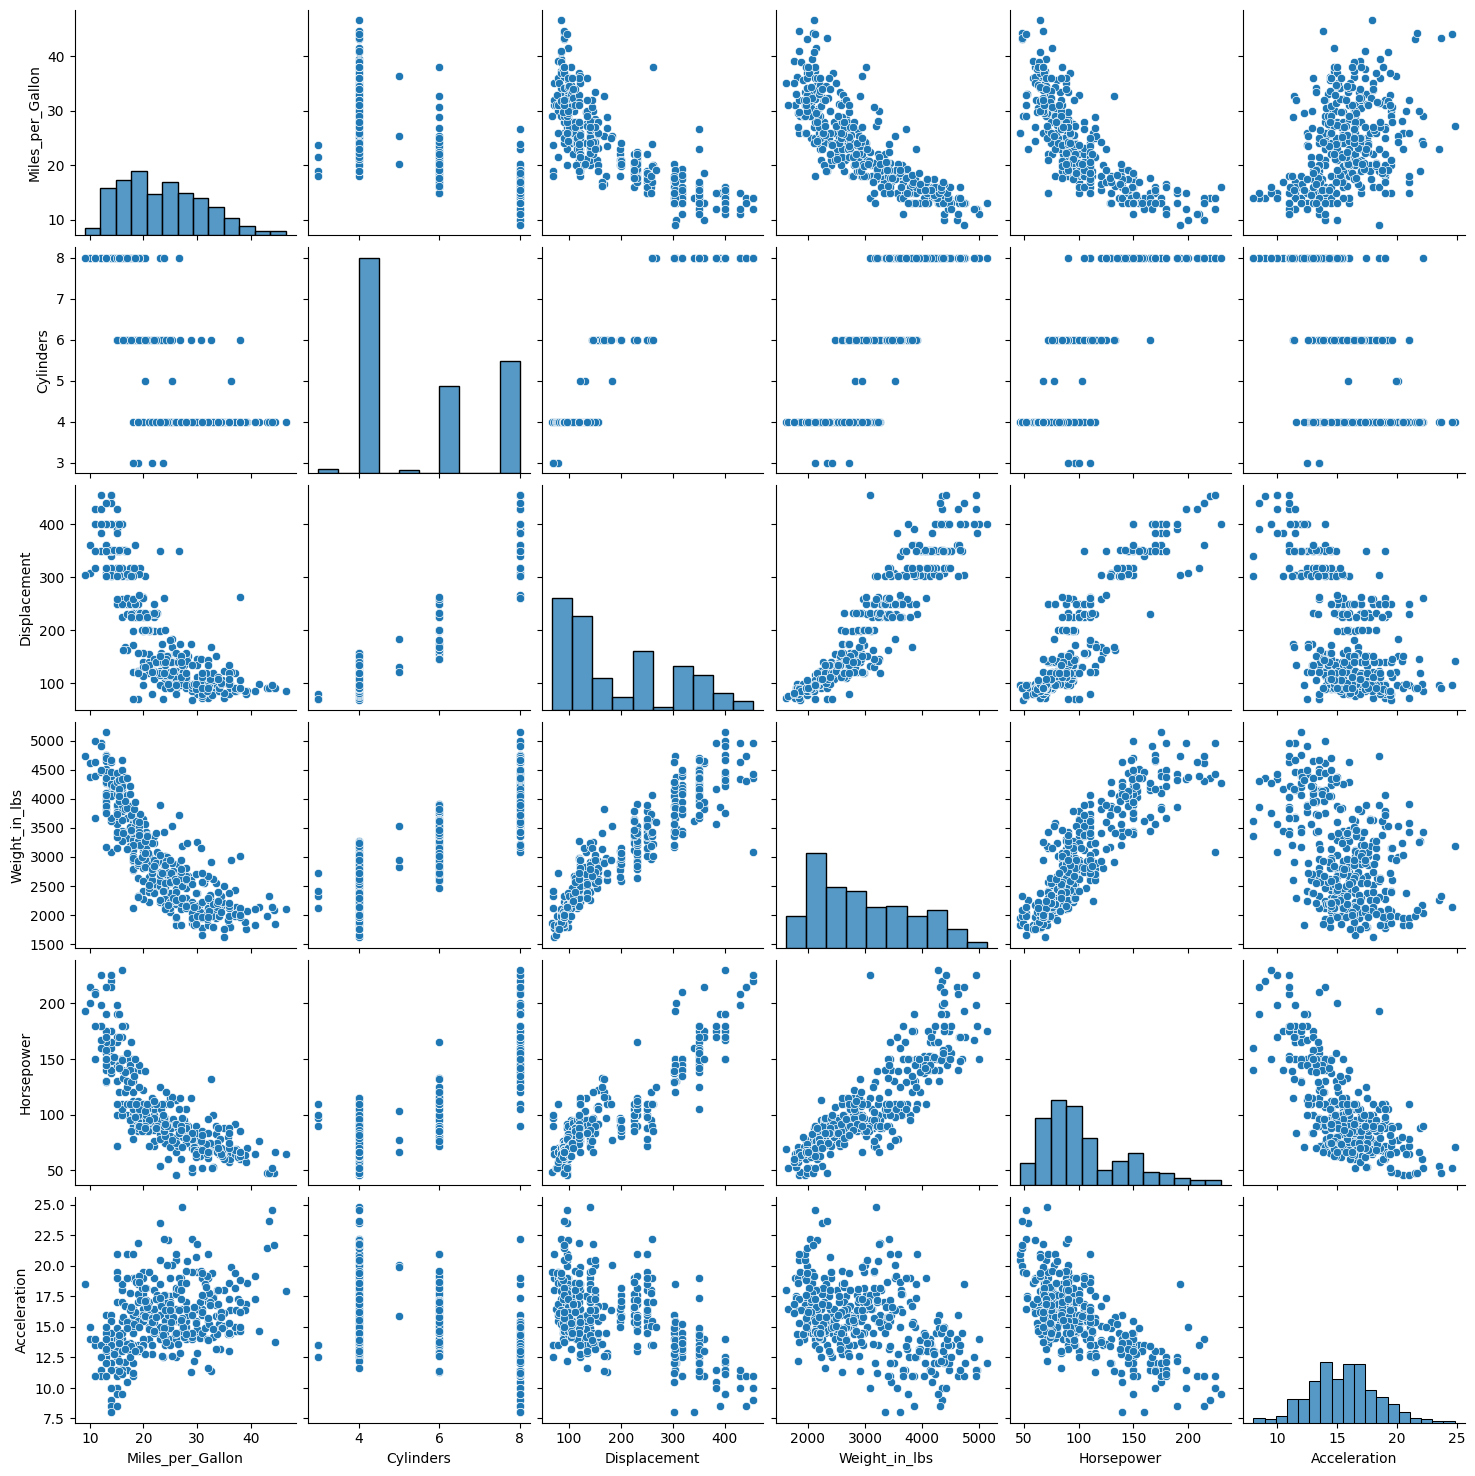

In [16]:
sns.pairplot(df_cars_num1)
plt.show()

#Line charts

## Using Seaborn

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data
import seaborn as sns

stocks = data.stocks() # from 2000-2010
stocks.shape, stocks.dtypes, stocks.info,  stocks['symbol'].unique()

((560, 3),
 symbol            object
 date      datetime64[ns]
 price            float64
 dtype: object,
 <bound method DataFrame.info of     symbol       date   price
 0     MSFT 2000-01-01   39.81
 1     MSFT 2000-02-01   36.35
 2     MSFT 2000-03-01   43.22
 3     MSFT 2000-04-01   28.37
 4     MSFT 2000-05-01   25.45
 ..     ...        ...     ...
 555   AAPL 2009-11-01  199.91
 556   AAPL 2009-12-01  210.73
 557   AAPL 2010-01-01  192.06
 558   AAPL 2010-02-01  204.62
 559   AAPL 2010-03-01  223.02
 
 [560 rows x 3 columns]>,
 array(['MSFT', 'AMZN', 'IBM', 'GOOG', 'AAPL'], dtype=object))

In [18]:
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


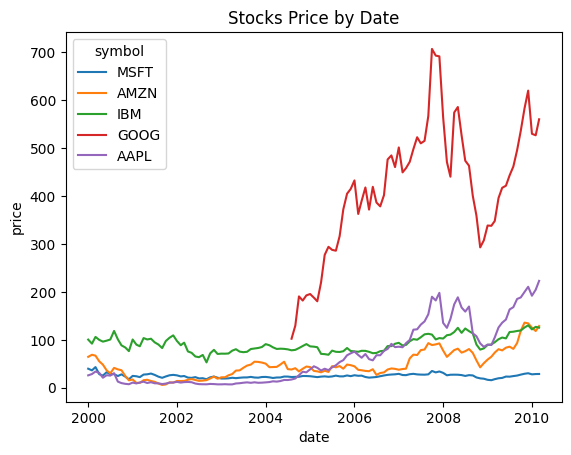

In [19]:
# plot the line
sns.lineplot(data = stocks, x='date', y = 'price', hue = 'symbol')

# you get the axes labels and the legend *for free* by using sns
plt.title("Stocks Price by Date")
plt.show()

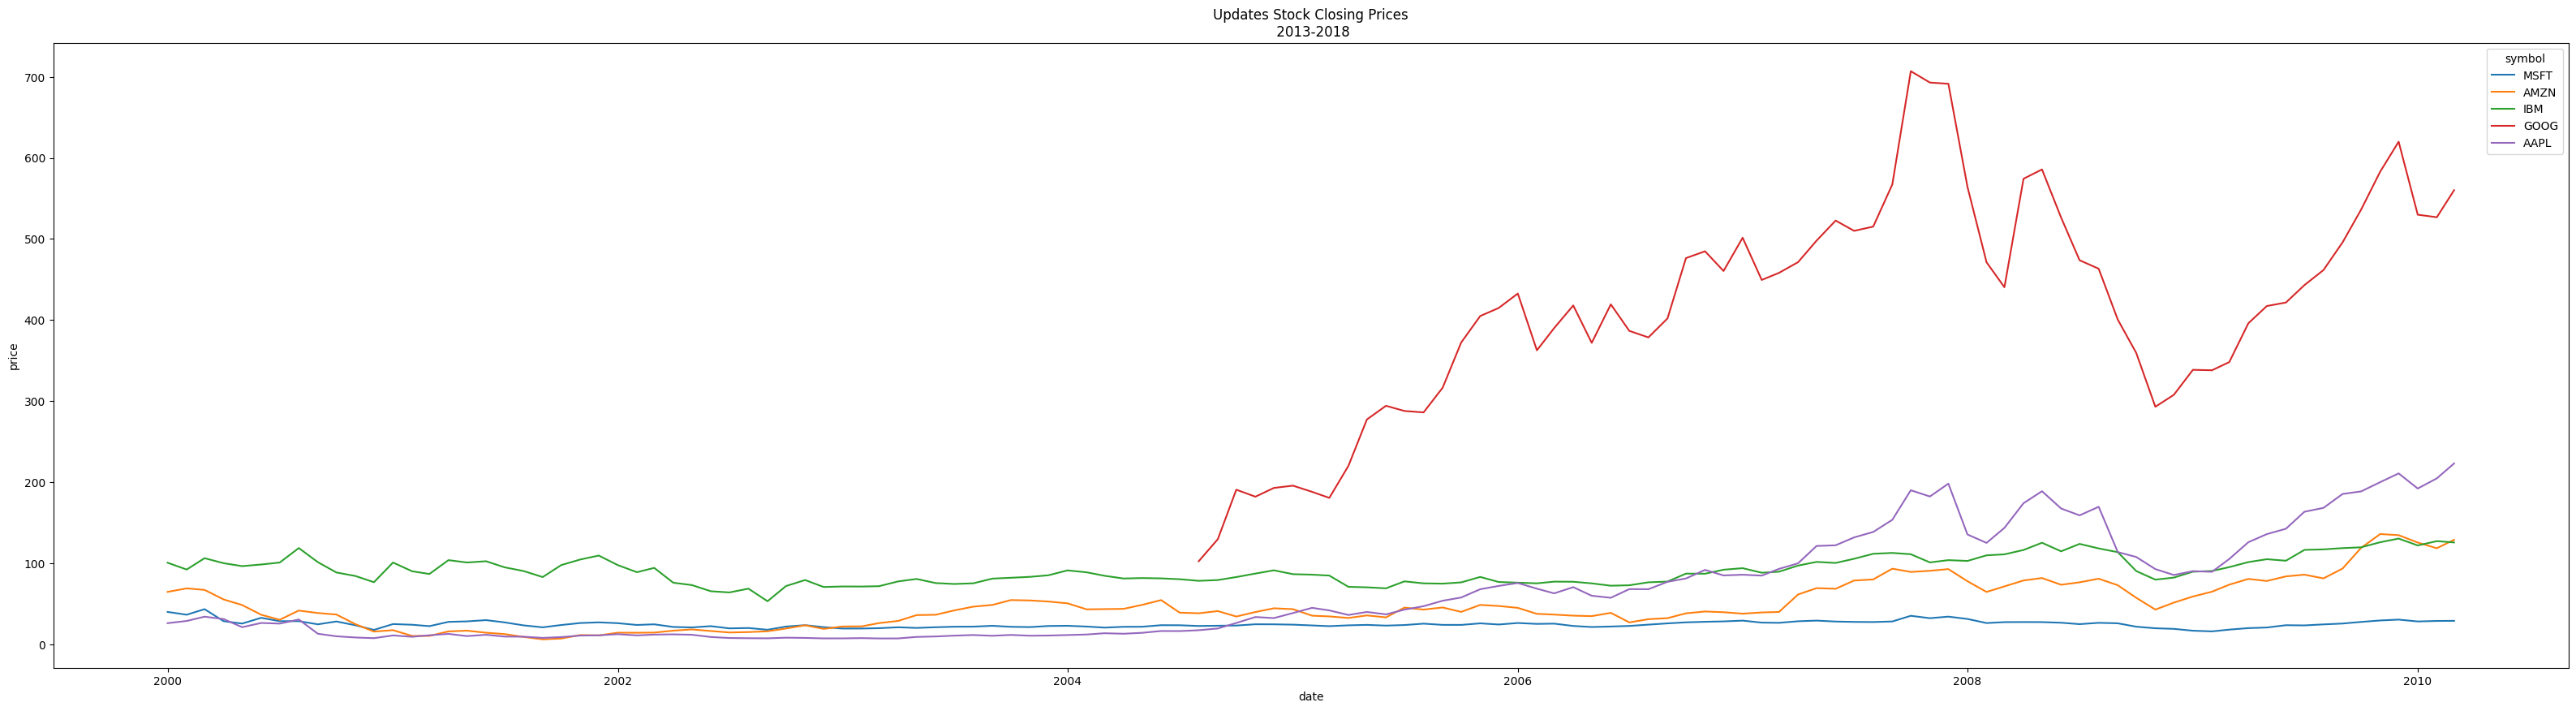

In [20]:
plt.figure(figsize=(40,10))
sns.lineplot(data=stocks, x='date', y='price', hue='symbol')
plt.title("Updates Stock Closing Prices\n 2013-2018")
plt.show()

##Playing with Styles

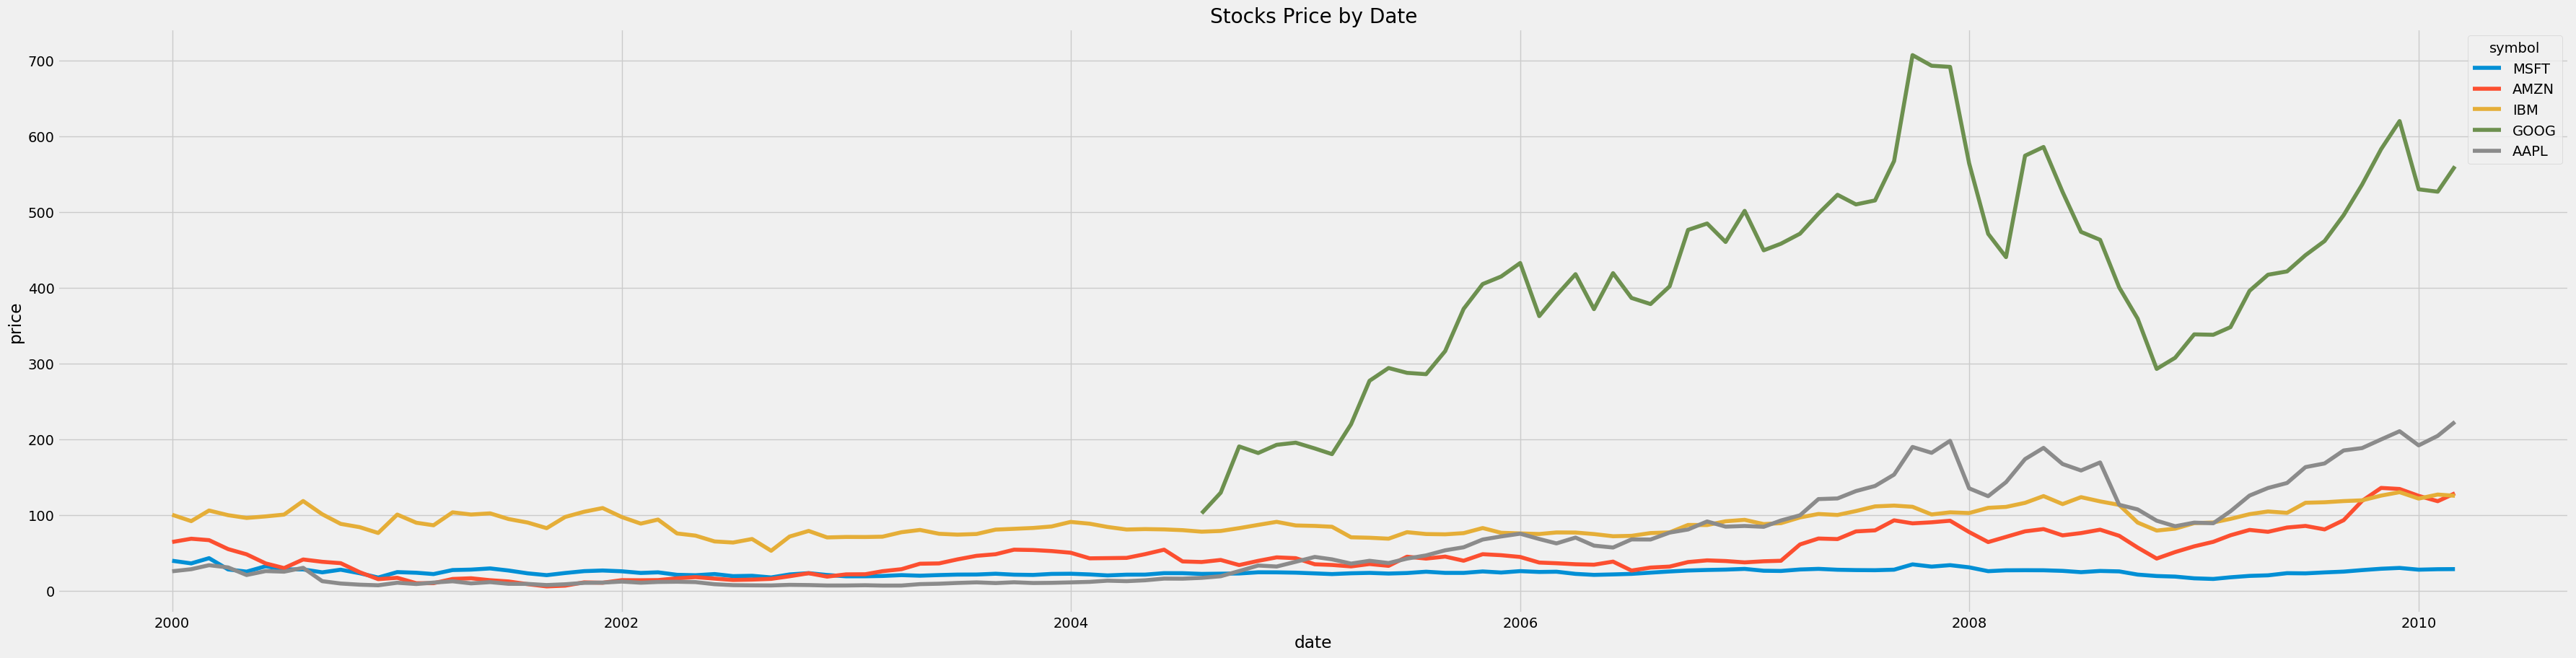

In [21]:
import matplotlib.style as style
style.use('fivethirtyeight')

plt.figure(figsize=(40,10))
sns.lineplot(data = stocks, x='date', y = 'price', hue = 'symbol')
plt.title("Stocks Price by Date")
plt.show()

In [22]:
style.available # what are all the styles that are available to me?

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

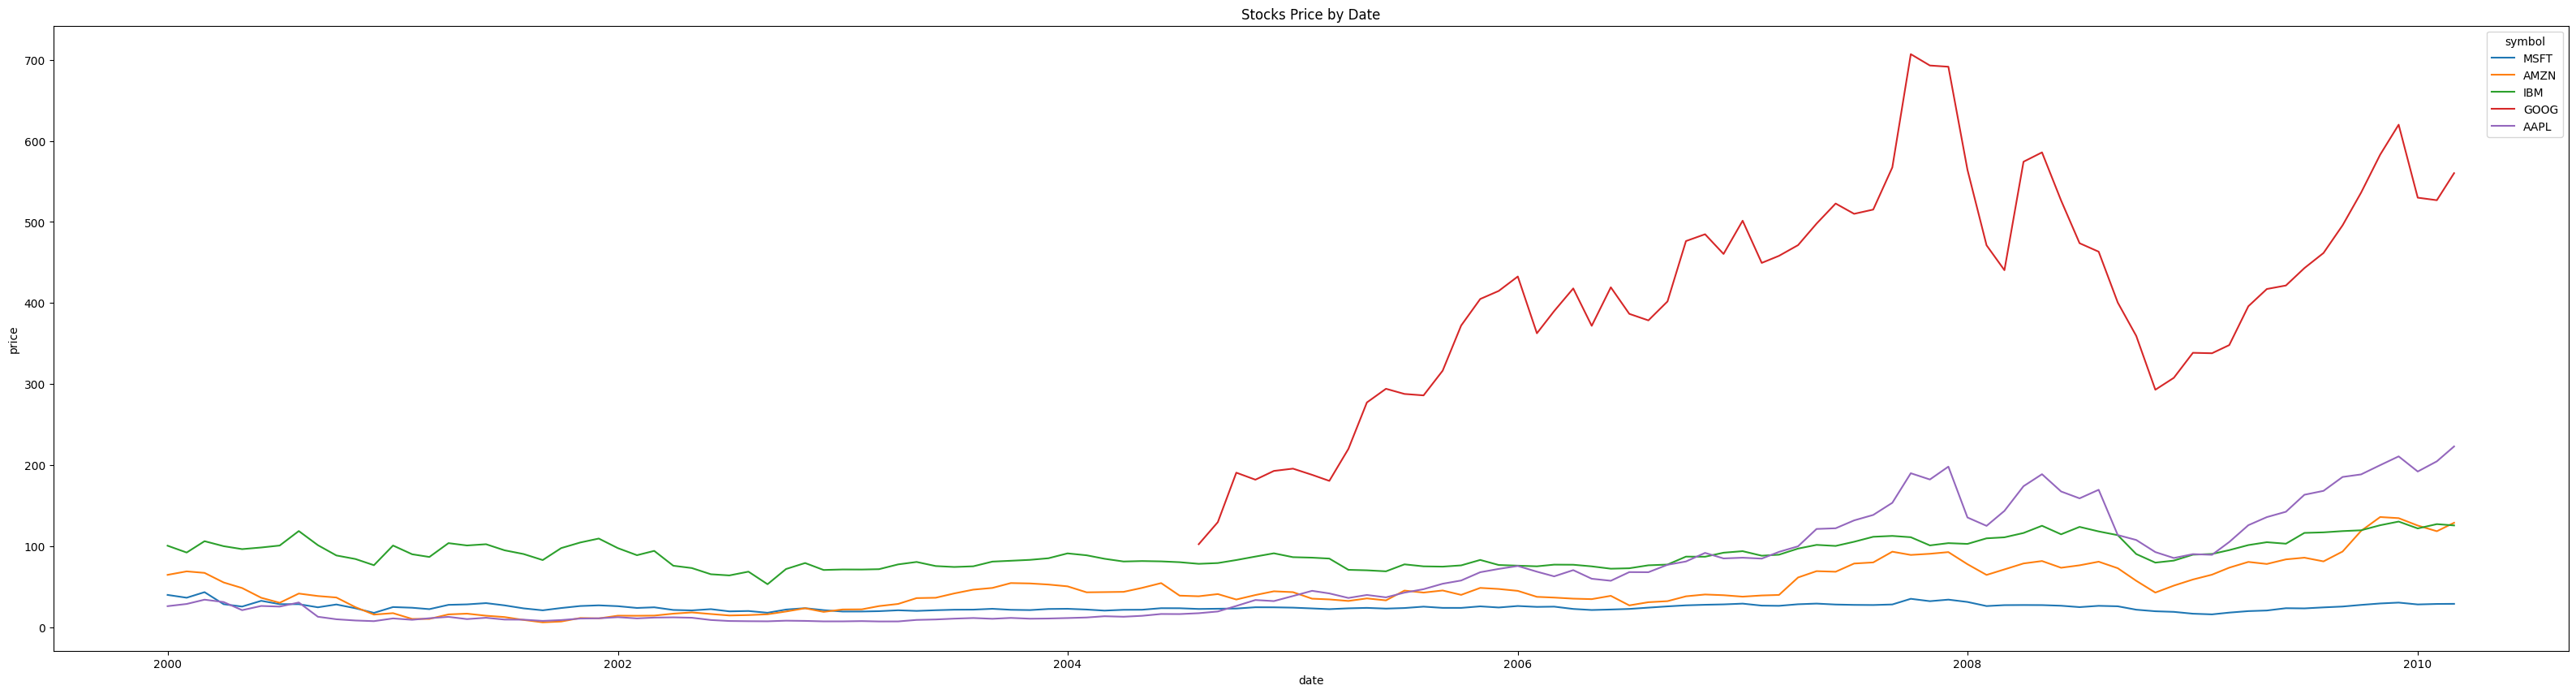

In [23]:
style.use('default') # go back to the default style

plt.figure(figsize=(40,10))
sns.lineplot(data = stocks, x='date', y = 'price', hue = 'symbol')
plt.title("Stocks Price by Date")
plt.show()

## Updated Stock Data
Found an updated data set for these stocks from 2019-present

Data on Yahoo Finance

In [24]:
appl = pd.read_csv("https://raw.githubusercontent.com/anjaleeDS/TECH26_F24/refs/heads/main/AAPL.csv")
amzn = pd.read_csv("https://raw.githubusercontent.com/anjaleeDS/TECH26_F24/refs/heads/main/AMZN.csv")
goog = pd.read_csv("https://raw.githubusercontent.com/anjaleeDS/TECH26_F24/refs/heads/main/GOOG.csv")
ibm = pd.read_csv("https://raw.githubusercontent.com/anjaleeDS/TECH26_F24/refs/heads/main/IBM.csv")
msft = pd.read_csv("https://raw.githubusercontent.com/anjaleeDS/TECH26_F24/refs/heads/main/MSFT.csv")

In [25]:
df_stocks = pd.concat([appl, amzn, goog, ibm, msft]) # pd.concat = concatenate the inputs

df_stocks.infer_dtypes = True

df_stocks['Name'].unique(), df_stocks.dtypes

(array(['AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT'], dtype=object),
 Name           object
 Date           object
 Close/Last    float64
 Volume        float64
 Open          float64
 High          float64
 Low           float64
 dtype: object)

In [26]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_stocks.dtypes

<ipython-input-26-c80d4f17a9a1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])


,0
Name,object
Date,datetime64[ns]
Close/Last,float64
Volume,float64
Open,float64
High,float64
Low,float64


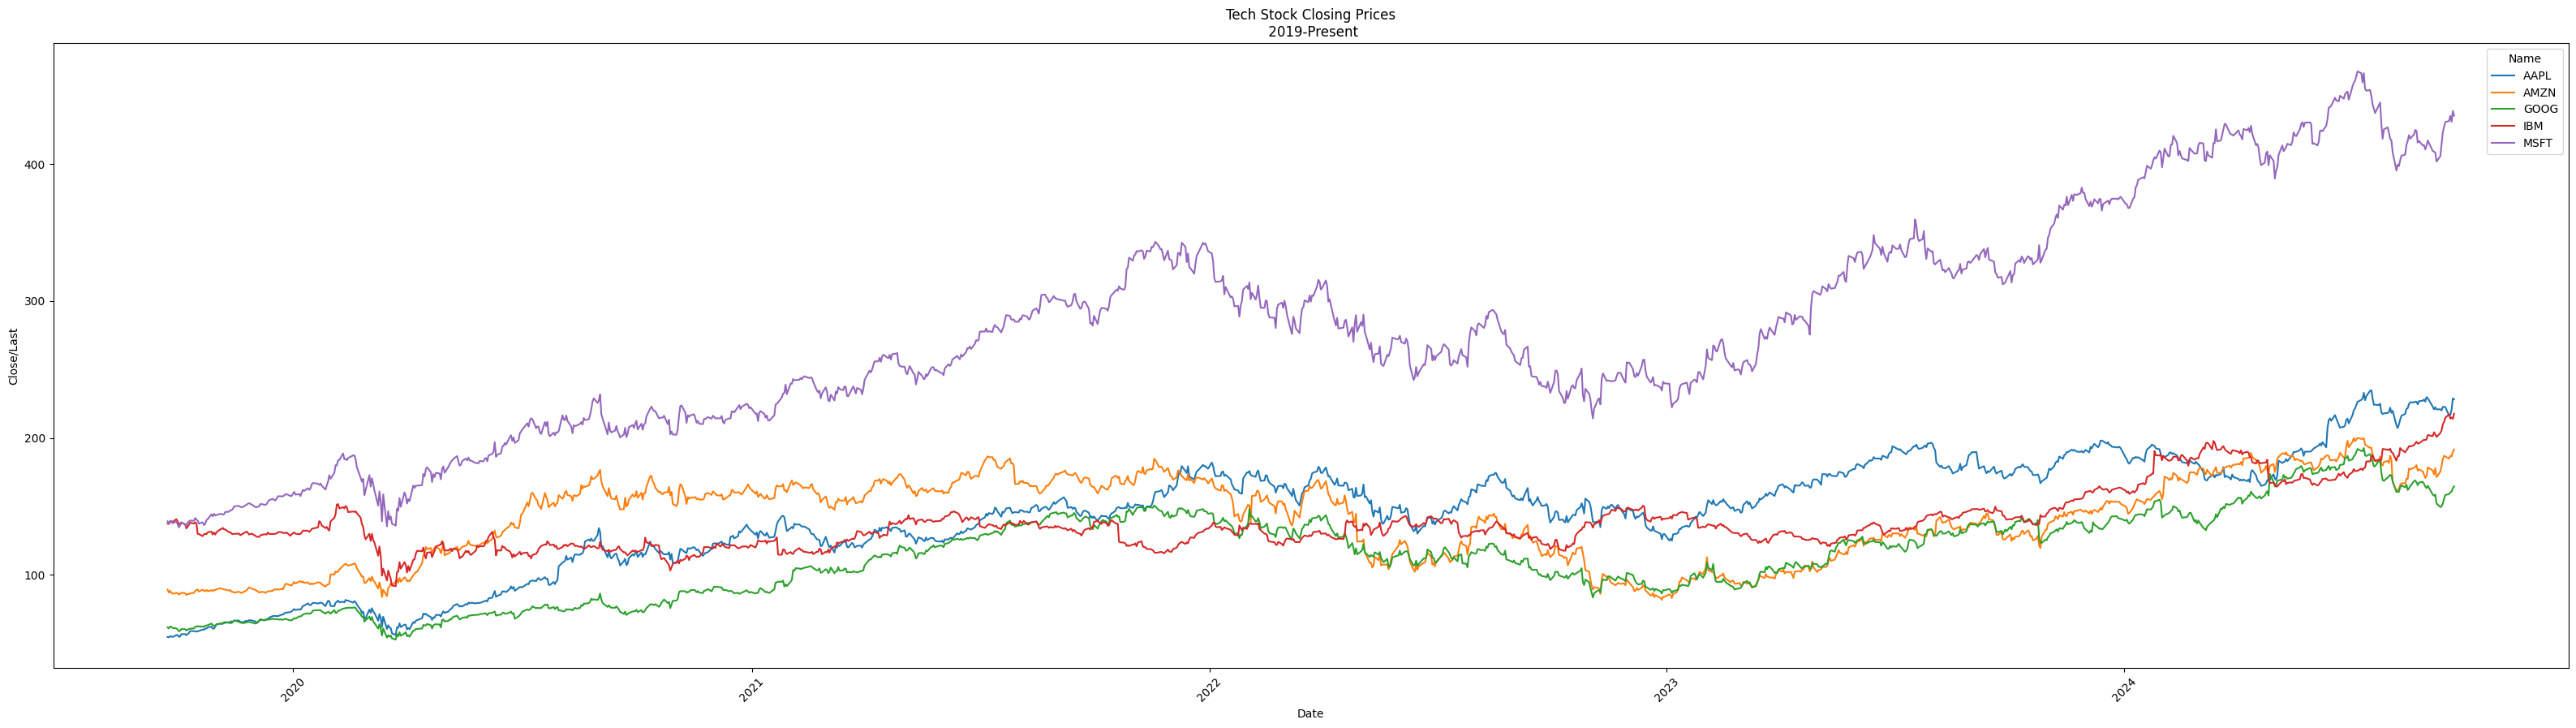

In [27]:
plt.figure(figsize=(40,10))

sns.lineplot(data=df_stocks, x='Date', y='Close/Last', hue='Name')
plt.title("Tech Stock Closing Prices\n 2019-Present")
plt.xticks(rotation=45)
plt.show()

## Using Plotly for Line charts

**Matplotlib is to Seaborn as Plotly is to Plotly Express**

The later library was built to simplify and lessen the code needed to visualize data.

In [28]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
from vega_datasets import data

appl = pd.read_csv("https://raw.githubusercontent.com/anjaleeDS/TECH26_F24/refs/heads/main/AAPL.csv")
amzn = pd.read_csv("https://raw.githubusercontent.com/anjaleeDS/TECH26_F24/refs/heads/main/AMZN.csv")
goog = pd.read_csv("https://raw.githubusercontent.com/anjaleeDS/TECH26_F24/refs/heads/main/GOOG.csv")
ibm = pd.read_csv("https://raw.githubusercontent.com/anjaleeDS/TECH26_F24/refs/heads/main/IBM.csv")
msft = pd.read_csv("https://raw.githubusercontent.com/anjaleeDS/TECH26_F24/refs/heads/main/MSFT.csv")

df_stocks = pd.concat([appl, amzn, goog, ibm, msft])

df_stocks.infer_dtypes = True

df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

df_stocks['Name'].unique(), df_stocks.dtypes

<ipython-input-28-da7b4b932ecf>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])


(array(['AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT'], dtype=object),
 Name                  object
 Date          datetime64[ns]
 Close/Last           float64
 Volume               float64
 Open                 float64
 High                 float64
 Low                  float64
 dtype: object)

In [29]:
df_stocks.head()

,Name,Date,Close/Last,Volume,Open,High,Low
0,AAPL,2024-09-20,228.20,318679900.0,229.97,233.09,227.62
1,AAPL,2024-09-19,228.87,66781320.0,224.99,229.82,224.63
2,AAPL,2024-09-18,220.69,59894930.0,217.55,222.71,217.54
3,AAPL,2024-09-17,216.79,45519340.0,215.75,216.90,214.50
4,AAPL,2024-09-16,216.32,59357430.0,216.54,217.22,213.92


In [30]:
df_stocks.sort_values('Date', inplace=True) # plotly doesn't reverse the dates like seaborn does! weird optimization

fig = px.line(df_stocks, x="Date", y="Close/Last", color="Name", title="plotly version of stocks\n from 2020-Present")
fig.show()

#Let's take a look at what else plotly can do

Using Amazon movies dataset from [kaggle](https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows)

In [31]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from vega_datasets import data


url = "https://raw.githubusercontent.com/anjaleeDS/TECH26_F24/refs/heads/main/amazon_prime_titles.csv"
df = pd.read_csv(url)

df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


##Look and clean data

Column types need to be corrected:
-  date_added : datetime type, with month, day, year format
- release_year : datetime type, year only


In [32]:
# Update date_added and release_year is a datetime type
# %B means the full month name https://www.w3schools.com/python/python_datetime.asp
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

df.dtypes, df.head()

(show_id                 object
 type                    object
 title                   object
 director                object
 cast                    object
 country                 object
 date_added      datetime64[ns]
 release_year    datetime64[ns]
 rating                  object
 duration                object
 listed_in               object
 description             object
 dtype: object,
   show_id   type                 title        director  \
 0      s1  Movie   The Grand Seduction    Don McKellar   
 1      s2  Movie  Take Care Good Night    Girish Joshi   
 2      s3  Movie  Secrets of Deception     Josh Webber   
 3      s4  Movie    Pink: Staying True  Sonia Anderson   
 4      s5  Movie         Monster Maker    Giles Foster   
 
                                                 cast         country  \
 0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
 1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
 2  Tom Sizemore, Lorenzo

In [33]:
# look around the data
df['type'].unique(), df['rating'].unique(), df['duration'].unique(), df['country'].unique()

(array(['Movie', 'TV Show'], dtype=object),
 array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
        'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
        'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
        'NOT_RATE'], dtype=object),
 array(['113 min', '110 min', '74 min', '69 min', '45 min', '52 min',
        '98 min', '131 min', '87 min', '92 min', '88 min', '93 min',
        '94 min', '46 min', '96 min', '1 Season', '104 min', '62 min',
        '50 min', '3 Seasons', '2 Seasons', '86 min', '36 min', '37 min',
        '103 min', '9 min', '18 min', '14 min', '20 min', '19 min',
        '22 min', '60 min', '6 min', '54 min', '5 min', '84 min',
        '126 min', '125 min', '109 min', '89 min', '85 min', '56 min',
        '40 min', '111 min', '33 min', '34 min', '95 min', '99 min',
        '78 min', '4 Seasons', '77 min', '55 min', '53 min', '115 min',
        '58 min', '49 min', '135 min', '91 min', '64 min', '59 min',
    

Duration columns has number of minutes and season. It would be cleaner if we can confirm that durations that have "Season" are TV Shows and not Movies.

Movies should be number of minutes of type integer and without the "min".

In [34]:
# Replace the "min" within duration
df['duration'] = df['duration'].str.replace(' min', '')

# Then look for duration values that still have letters in them to check if they are all "Seasons"
tv_show = df[df['duration'].str.contains(r'[a-zA-Z]')]
tv_show['type'].unique()

array(['TV Show'], dtype=object)

confirmed that all records with duration containing the word "Season" is a type TV Show

In [35]:
# I want to see only movies so a separate dataframe is good to have just for movies
df_movies = df[df['type'] == 'Movie']

# movies only have duration in minutes so change the type to number
df_movies['duration'] = pd.to_numeric(df_movies['duration'])

df_movies.dtypes

<ipython-input-35-45cdac2737b4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,datetime64[ns]
rating,object
duration,int64


## Barcharts

Let's make a bar chart of the count of movies made every year after 2000




In [36]:
# I only want to see the movies from 2000 and onwards

df_2000 = df_movies[df_movies['release_year'] >= '01-01-2000']
df_2000.shape

(6222, 12)

In [37]:
# let's make a distribution chart of the count of movies made every year after 2000
fig = px.histogram(df_2000, x = 'release_year')
fig.show()

In [43]:
# how about some box plots where it shows the distribution of movie durations
# from the top EU countries
eu_movies = df_movies[df_movies['country'].isin(['United Kingdom','Spain', 'France', 'Germany', 'Italy'])]

fig = px.box(eu_movies, x='country', y='duration', title='EU Movies Duration by Country', color='country')
fig.show()


In [44]:
fig.write_html('EU Movies Duration.html')

## Scatter plots with plotly

In [39]:
# i'm interested in the movie title that are on
# the Kids list, and from a English dominant speaking country

kids_movies = df_movies[
    (df_movies['listed_in'].str.contains('Kids')) &
    (df_movies['country'].str.contains('United States|Canada|United Kingdom'))
    ]

fig = px.scatter_3d(kids_movies, x='release_year', y='duration', z='rating', color='country', hover_name='title', hover_data='director', title='Movies by year, duration and rating.\nThis is actually a 4D plot\n theres x,y,z and color on here')
fig.show()

In [40]:
fig.write_html('EU Movies Duration1.html')

In [41]:
# just because you can make it 3D, doesn't mean you should!
# let's go 2D, keep the color type, and ask for the hover-box options to contain the movie rating (age_certification)

# fig = px.scatter(df, x='runtime' , y='imdb_score', hover_name='title', hover_data ='age_certification', color='type')
fig = px.scatter(kids_movies, x='release_year' , y='duration', hover_name='title', hover_data ='cast', color='country', size='duration')

fig.update_xaxes(showgrid=True, gridcolor='LightPink', gridwidth=2)
fig.show()

In [42]:
df = pd.read_json("https://unpkg.com/vega-datasets@2.7.0/data/cars.json")
fig = px.scatter(df, x='Miles_per_Gallon', y='Horsepower',
           color = 'Origin', size='Weight_in_lbs',
           hover_name ='Name', hover_data='Cylinders', facet_col='Cylinders')
fig.update_layout(title=('Cylinder Data \n Lower power means more efficient gas usage'))